## Bring in data and libraries

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
%ls

Globe API Specification.html
Globepay Acceptance Report - Globepay Acceptance Report.csv
Globepay Chargeback Report - Globepay Chargeback Report.csv
Untitled.ipynb


In [3]:
df_chargeback = pd.read_csv('Globepay Chargeback Report - Globepay Chargeback Report.csv')
df_acceptance = pd.read_csv('Globepay Acceptance Report - Globepay Acceptance Report.csv')

In [4]:
df_chargeback.head()

,external_ref,status,source,chargeback
0,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
1,_0fqf75KiPa0iiviKCSsU,True,GLOBALPAY,False
2,_0H9Ecd_RctsLetId-p14,True,GLOBALPAY,False
3,_0wBrMzAzIhO3fQRWUcBH,True,GLOBALPAY,False
4,_25jZuGDrmwUEdAwKp1xV,True,GLOBALPAY,False


In [5]:
df_acceptance.head()

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."


In [6]:
df_acceptance.shape

(5430, 11)

In [7]:
df_chargeback.shape

(5430, 4)

In [8]:
df_acceptance.describe()

,amount
count,5430.000000
mean,86938.605757
std,50327.853421
min,-23.780000
25%,42481.355000
50%,85488.025000
75%,128548.397500
max,180371.520000


In [9]:
df_chargeback.describe()

,external_ref,status,source,chargeback
count,5430,5430,5430,5430
unique,5430,1,1,2
top,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
freq,1,5430,5430,5207


In [10]:

df_acceptance[df_acceptance.amount < 0]

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
11,SPm_aqm_Rrer_6jxpLvO2,True,GLOBALPAY,evt_1EhCNv4mRDFQzT2r2O5Cy5G,2019-01-01T04:48:00.000Z,ACCEPTED,False,-23.78,UK,GBP,"{""CAD"":1.4173511828553305,""EUR"":0.922579749754..."


## Check missing Data

In [31]:
percent_missing = df_acceptance.isnull().sum() * 100 / len(df_acceptance)
missing_value_df = pd.DataFrame({'column_name': df_acceptance.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
external_ref,external_ref,0.0
status,status,0.0
source,source,0.0
ref,ref,0.0
date_time,date_time,0.0
state,state,0.0
cvv_provided,cvv_provided,0.0
amount,amount,0.0
country,country,0.0
currency,currency,0.0


In [32]:
percent_missing = df_chargeback.isnull().sum() * 100 / len(df_chargeback)
missing_value_df = pd.DataFrame({'column_name': df_chargeback.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
external_ref,external_ref,0.0
status,status,0.0
source,source,0.0
chargeback,chargeback,0.0


# Task #1

### Outlines the volume (in USD) of the declined payments

In [11]:
# Creat usd_amount column for each transaction
def convert_currency(row):
    rates = json.loads(row['rates'])
    amount_usd = row['amount'] / rates[row['currency']]
    return amount_usd

df_acceptance['amount_usd'] = df_acceptance.apply(convert_currency, axis=1)




In [12]:
df_acceptance['state'].unique()

array(['DECLINED', 'ACCEPTED'], dtype=object)

In [75]:
# total amount of declined transactions in USD
df_acceptance[df_acceptance['state'] == 'DECLINED'].amount_usd.sum()

130877578.83076099

In [14]:
df_volumes = df_acceptance.groupby('state')['amount_usd'].agg(['sum','count'])
df_volumes.reset_index(inplace = True)

<AxesSubplot:xlabel='state', ylabel='sum'>

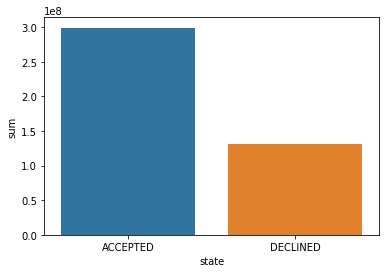

In [15]:
sns.barplot(data=df_volumes, x="state", y="sum")

<AxesSubplot:xlabel='state', ylabel='count'>

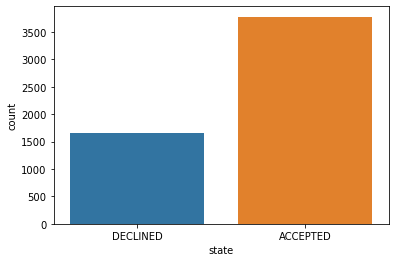

In [16]:
sns.countplot(df_acceptance['state'])

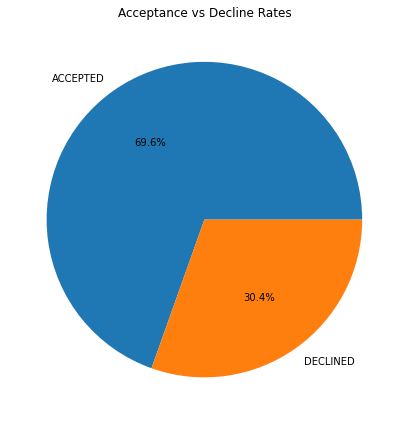

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df_volumes['count'], labels=['ACCEPTED','DECLINED'], autopct='%.1f%%')
ax.set_title('Acceptance vs Decline Rates')
plt.tight_layout()

### Analyses the problem root causes

#### Acceptance rate by binning amounts

In [62]:
bins = np.array([10, 100, 1000, 10000, 100000, 1000000])

df_amount = df_acceptance.groupby(pd.cut(df_acceptance.amount_usd, bins)).encoding.agg(case_count = 'count', acceptance_rate = 'mean')
df_amount

,case_count,acceptance_rate
amount_usd,,
"(10, 100]",9,0.666667
"(100, 1000]",150,0.726667
"(1000, 10000]",999,0.708709
"(10000, 100000]",2281,0.686541
"(100000, 1000000]",1990,0.696985


[]

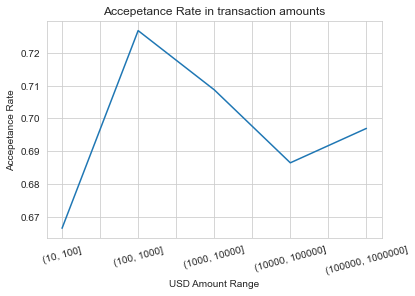

In [63]:
df_amount.acceptance_rate.plot()
plt.title('Accepetance Rate in transaction amounts')
plt.xticks(rotation=15)
plt.xlabel('USD Amount Range')
plt.ylabel('Accepetance Rate')
plt.plot()

#### Declined total amount by countries in USD

In [65]:
df_declined_amount = df_acceptance[df_acceptance.state == 'DECLINED'].groupby('country').amount_usd.sum().round(2)
df_declined_amount

country
AE    26335152.43
CA    18422315.65
FR    32628785.93
MX      876158.35
UK    27489496.69
US    25125669.78
Name: amount_usd, dtype: float64

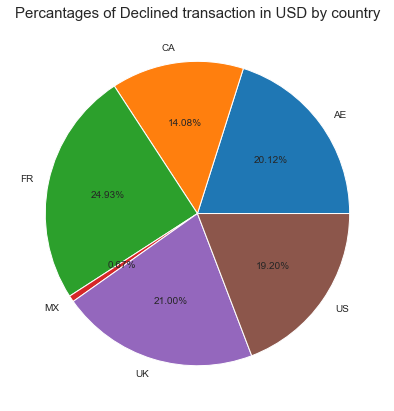

In [66]:
df_declined_amount.plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Declined transaction in USD by country', fontsize = 15)
plt.show()

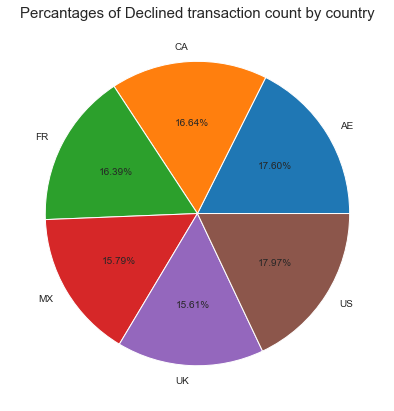

In [70]:
df_acceptance[df_acceptance.state == 'DECLINED'].groupby('country').size().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Declined transaction count by country', fontsize = 15)
plt.show()

#### Acceptance rate by countries 

In [54]:
df_acceptance.groupby('country').encoding.agg(case_count = 'count', acceptance_rate = 'mean')

,case_count,acceptance_rate
country,,
AE,905,0.678453
CA,905,0.696133
FR,905,0.700552
MX,905,0.711602
UK,905,0.714917
US,905,0.671823


In [ ]:
#### Acceptance rate by currency

In [55]:
df_acceptance.groupby('currency').encoding.agg(case_count = 'count', acceptance_rate = 'mean')


,case_count,acceptance_rate
currency,,
CAD,905,0.696133
EUR,905,0.700552
GBP,905,0.714917
MXN,905,0.711602
USD,1810,0.675138


#### Acceptance rate to CVV provision status

In [81]:
df_cvv = df_acceptance.groupby('cvv_provided').encoding.agg(case_count = 'count', acceptance_rate = 'mean')
df_cvv = df_cvv.reset_index()
df_cvv

,cvv_provided,case_count,acceptance_rate
0,False,5390,0.696104
1,True,40,0.625000


In [71]:
# To DO: 
#   1. Acceptance rate by hour and by country
#   2. Distribution plots -  they would also allow us create predictive models 


### Suggests solutions / recommendations 

### Lists further next steps (hypothesis / analysis) you would do as a next steps having more time and business knowledge

In [72]:
# 1. What time of day are transactions most succesfull
# 2. Implement a ML Decision tree to predict if the transaction will be declined or accepted.
# 3. Implement feature importance to see which features had the highest contribution to a card being declined or accepted.

# Task 2

## What is the acceptance rate over time?

In [20]:
# convert date to datetime 
df_acceptance['date_time'] = pd.to_datetime(df_acceptance['date_time'])
df_acceptance.index = pd.to_datetime(df_acceptance['date_time'])

In [22]:
# Change'state' column into 1 or 0
df_acceptance['encoding'] = df_acceptance.state.apply(lambda x: 1 if x == 'ACCEPTED' else 0)

In [25]:
sns.set_style('whitegrid')
df_weekly = df_acceptance['encoding'].resample('W').mean()
df_monthly = df_acceptance['encoding'].resample('M').mean()
df_monthly

date_time
2019-01-31 00:00:00+00:00    0.695699
2019-02-28 00:00:00+00:00    0.701190
2019-03-31 00:00:00+00:00    0.689247
2019-04-30 00:00:00+00:00    0.677778
2019-05-31 00:00:00+00:00    0.693548
2019-06-30 00:00:00+00:00    0.716667
Freq: M, Name: encoding, dtype: float64

[]

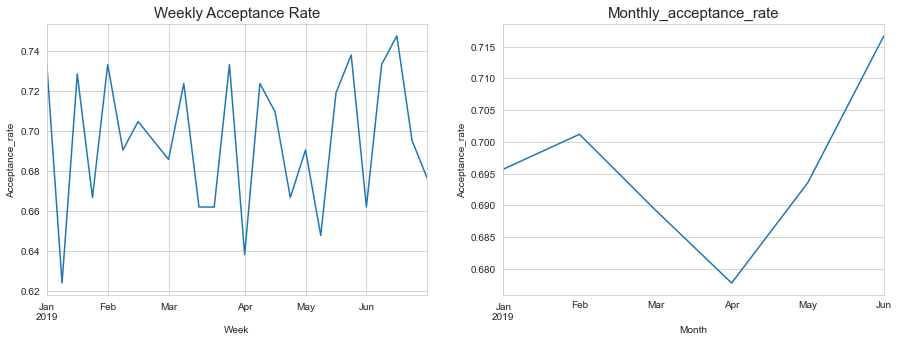

In [26]:
fig,[ax1, ax2] = plt.subplots(nrows=1,ncols=2, figsize = (15,5))

df_weekly.plot(ax=ax1).set(xlabel="Week", ylabel="Acceptance_rate")
ax1.set_title("Weekly Acceptance Rate", fontsize = 15)

df_monthly.plot(ax=ax2).set(xlabel="Month", ylabel="Acceptance_rate")
ax2.set_title("Monthly_acceptance_rate", fontsize = 15)

plt.plot() 

In [28]:
# To DO: Carry out daily weekly rates

## List the countries where the amount of declined transactions went over $25M

In [44]:
df_declined_transactions = df_acceptance[df_acceptance.state=='DECLINED'].groupby(['state','country'])['amount_usd'].sum().sort_values(ascending=False).reset_index()
df_declined_transactions

,state,country,amount_usd
0,DECLINED,FR,3.262879e+07
1,DECLINED,UK,2.748950e+07
2,DECLINED,AE,2.633515e+07
3,DECLINED,US,2.512567e+07
4,DECLINED,CA,1.842232e+07
5,DECLINED,MX,8.761584e+05


In [47]:
df_declined_transactions[df_declined_transactions.amount_usd > 25000000]['country'].unique()

array(['FR', 'UK', 'AE', 'US'], dtype=object)

## Which transactions are missing chargeback data?

In [50]:
# left join the 2 data sets
merged_data = df_acceptance.merge(df_chargeback,on='external_ref',how='left')
merged_data.head()

,external_ref,status_x,source_x,ref,date_time,state,cvv_provided,amount,country,currency,rates,amount_usd,encoding,status_y,source_y,chargeback
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01 00:00:00+00:00,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,...",1020.46,0,True,GLOBALPAY,False
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01 04:48:00+00:00,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,...",1582.57,1,True,GLOBALPAY,True
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01 09:36:00+00:00,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,...",1653.07,0,True,GLOBALPAY,False
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01 14:24:00+00:00,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,...",2228.17,1,True,GLOBALPAY,True
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01 19:12:00+00:00,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,...",2589.92,1,True,GLOBALPAY,True


In [52]:
merged_data.chargeback.isna().sum()

0